In [36]:
from pandas import Series, read_csv, DataFrame
import random
import matplotlib.pyplot as plt

from generateTestingData.useGeneratedData import makeDataUsable
from geneticAlgorithms.geneticAlgorithm import GeneticAlgorithm
from geneticAlgorithms.useGeneticAlgorithm import printSols
# from main.ML.Model import Predicter
from main.generateTestingData.useGeneratedData import NewPredicter

In [2]:
# ga = GeneticAlgorithm(populationLimit=1000,
#                           maxGenerations=1000,
#                         #   maxValue=35,
#                         #   minValue=0,
#                           numberOfVariables=28,
#                           sd=0.2,
#                           mutationChance=0.4,
#                           toKeep=4)
    
# individuals = ga.run()

In [3]:
# p = Predicter()
# p.loadModel("xgb_gen_80-15-37-65")

# solDict = {1:0, 0:0}
# so = []
# for sols in individuals:
#     preProcessed = p.preProcess(list(individuals[0][1]))[0]
#     s = p.predict(preProcessed)
#     solDict[int(s)] += 1
#     so.append(s[0])

# print(solDict)

# printSols(individuals[:10])
# printSols(individuals[-10:])

In [4]:
# comparingData = makeDataUsable(read_csv("../data/generatedData.csv"), 4, 4)

In [5]:
# comparingData.head()

In [6]:
# Dropping time and angular speeds

# comparingData.drop(columns=comparingData.columns[17:-1], axis=1, inplace=True)
# comparingData.drop(columns=comparingData.columns[0], axis=1, inplace=True)

In [7]:
# comparingData = comparingData.loc[comparingData['COL'] == 1]

# print(len(comparingData))
# comparingData.head()

In [8]:
# def findBestMatch(individual, data):
#     bestMatch = (-1, 99999) # index, matchScore, lower is better
#     minVals = data.min()
#     maxVals = data.max()
#     for i, row in data.iterrows():
#         score = 0
#         for val, c, min, max in zip(individual, row, minVals, maxVals):
#             score += abs(c-val)/(max-min)*100
#         if bestMatch[1] > score:
#             bestMatch = (i, score)
#     return bestMatch

# findBestMatch(testingSol, comparingData)


In [9]:
# Extracing relevant features from solutions
def getRelevantDataFromIndividuals(individuals):
    return [ind[1][:16] for ind in individuals]
    # sortedInd = []
    # for _, ind in individuals:
    #     sortedInd.append(ind[:16])
    # return sortedInd

# relIndividuals = getRelevantDataFromIndividuals(individuals)
# print(len(relIndividuals))
# print(relIndividuals[:3])

In [10]:
def findBestMatch(rank, individual, data, minVals, maxVals):
    rowIndex = -1
    bestScore = 99999
    for i, row in data.iterrows():
        score = 0
        for colIndex, (val, c, min, max) in enumerate(zip(individual, row, minVals, maxVals)):
            if colIndex > 7 and colIndex < 12:
                continue
            score += abs(c-val)/(max-min)*100
        if bestScore > score:
            rowIndex = i
            bestScore = score
    return rank, rowIndex, bestScore

In [11]:
def findAllMatches(individuals, data, removeRows=True):
    matches = []
    data = data[data.columns[:-1]].copy()
    minVals = data.min()
    maxVals = data.max()
    amount = len(individuals)
    for rank, individual in enumerate(individuals):
        matches.append(findBestMatch(rank, individual, data, minVals, maxVals))
        if removeRows:
            data.drop(matches[-1][1], inplace=True)
        if (rank+1) % 100 == 0:
            print(f"Found a match for {rank+1} out of {amount} individuals", end="\r")
    print()
    print("Found a match for all individuals.")
    return matches

In [12]:
# Find the score of genetic algorithm
def accuracy(matches, data):
    percent = [5,10,25,50,100]
    for p in percent:
        amount = int(p/100 * len(matches))
        correct = 0
        for _, rowIndex, _ in matches[:amount]:
            correct += data.loc[rowIndex]["COL"]
        print(f"Accuracy for top {p}% individuals from GA:".ljust(42), correct/amount, f"\t{int(correct)} out of {amount}")

# accuracy(allMatches)

# Loading data

In [14]:
comparingData = makeDataUsable(read_csv("../data/generatedData.csv"), 4, 5)
comparingData.drop(columns=comparingData.columns[17:-1], axis=1, inplace=True)
comparingData.drop(columns=comparingData.columns[0], axis=1, inplace=True)
# comparingData = comparingData.loc[comparingData['COL'] == 1]
print(f"Number of rows: {len(comparingData)}")
display(comparingData.head())

Number of rows: 3950


,TTC1,TTC2,TTC3,TTC4,DTO1,DTO2,DTO3,DTO4,JERK1,JERK2,JERK3,JERK4,Speed1,Speed2,Speed3,Speed4,COL
0,50.0,50.0,50.0,50.000,16.6264,100.0,100.0,100.0000,0.004,0.661,4.117,0.865,2.881,0.661,5.439,11.082,0.0
1,50.0,50.0,50.0,50.000,100.0000,100.0,100.0,100.0000,0.661,4.117,0.865,3.704,0.661,5.439,11.082,13.021,0.0
2,50.0,50.0,50.0,50.000,100.0000,100.0,100.0,100.0000,4.117,0.865,3.704,2.233,5.439,11.082,13.021,12.727,0.0
3,50.0,50.0,50.0,50.000,100.0000,100.0,100.0,100.0000,0.865,3.704,2.233,0.009,11.082,13.021,12.727,12.442,0.0
4,50.0,50.0,50.0,5.322,100.0000,100.0,100.0,83.3296,3.704,2.233,0.009,2.308,13.021,12.727,12.442,14.465,0.0


# Generating individuals from the genetic algorithm

In [15]:
# random.seed(51)
ga = GeneticAlgorithm(populationLimit=5000,
						maxGenerations=700,
						tmParticipants=3,
						variation=5,
						mutationChance=0.4,
						fitnessGoal = 1000,
						toKeep=2)
    
individuals = ga.run()

=== Gen 0 best individual ===
	Fitness: 0.06571809      Values: (3.1831192153567542, 8.116940438925887, 22.006186642458374, 10.189735333413047, 12.412021223797552, 3.752751274829521, 61.18478456943992, 25.395470630975225, 44.002383732722016, 83.02063553318841, 1.9736677428763443, 17.62989353943557, 4.948815835664309, 4.266547968746725, 0.998837234806949, 2.231080585251938, 0.1750008697081511, 0.5285724440786653, -0.09924810234876014, 0.4474400148837503, -0.2166363746583615, -0.9557700147830221, -0.8580882972521118, -0.2816514043353915, -0.4477321720017111, -0.473127758978511, 0.4074984425120475, 0.6016716448257882)
=== Gen 100 best individual ===
	Fitness: 15.35185271     Values: (3.172034152496522, 3.995179520448616, 4.641579130340581, 2.7181056985455, 10.733854870401132, 18.14745989338357, 12.981990878608258, 8.92553416493763, 19.488955095232996, 42.18143277721197, 30.272250820408786, 52.51224006451794, 3.6795057662675426, 5.02546188263943, 2.730024164422538, 3.638949806863767, 0.963

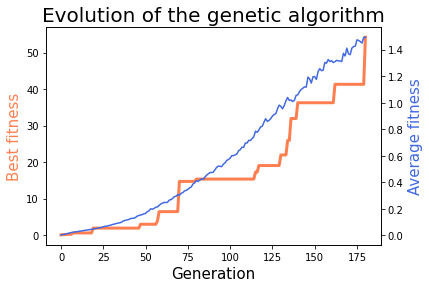

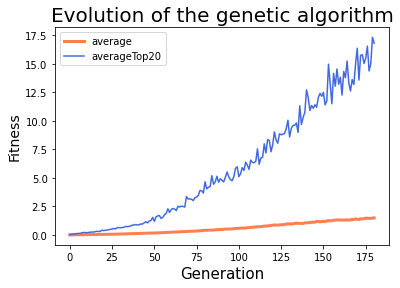

In [16]:
def plotEvolution(history, saveFig, filename):
    sizes = {
        "figureSize" : (15,8),
        "font_xs" : 5,
        "font_s" : 10,
        "font_m" : 15,
        "font_l" : 20,
        "lines" : 3
    }
    # plt.subplot(121)
    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    color1 = "coral"
    color2 = "royalblue"

    ax.plot(history["generation"],  history["best"],  color=color1, linewidth=sizes["lines"])
    ax.set_ylabel("Best fitness", color=color1, fontsize=sizes["font_m"])

    ax2.plot(history["generation"], history["average"], color=color2, )
    ax2.set_ylabel("Average fitness", color=color2, fontsize=sizes["font_m"])

    ax.set_xlabel("Generation", fontsize = sizes["font_m"])

    plt.title(f"Evolution of the genetic algorithm", fontsize=sizes["font_l"])
    plt.xticks(fontsize=sizes["font_s"])
    plt.yticks(fontsize=sizes["font_s"])
    plt.show()

    fig, ax = plt.subplots()
    # ax2 = ax.twinx()

    color1 = "coral"
    color2 = "royalblue"

    ax.plot(history["generation"],  history["average"],  color=color1, linewidth=sizes["lines"], label="average")
    # ax.set_ylabel("Average fitness", color=color1, fontsize=sizes["font_m"])

    ax.plot(history["generation"], history["averageTop20"], color=color2, label="averageTop20")
    # ax.set_ylabel("Top 20 average fitness", color=color2, fontsize=sizes["font_m"])

    ax.set_xlabel("Generation", fontsize = sizes["font_m"])
    ax.set_ylabel("Fitness", fontsize = 14)

    plt.title(f"Evolution of the genetic algorithm", fontsize=sizes["font_l"])
    plt.xticks(fontsize=sizes["font_s"])
    plt.yticks(fontsize=sizes["font_s"])
    plt.legend()

    if saveFig:
        plt.savefig(f"../data/figures/{filename}")
    plt.show()

# ga.plotEvolution(False, "")
plotEvolution(ga.history, False, "")

# Running GA multiple time to generate more fit individuals

In [105]:
# RUN GA multiple times
gaList = []
CombinedIndividuals = []
for i in range(5):
    print(f"\n Run number: {i}")
    gaList.append(GeneticAlgorithm(populationLimit=1000,
						maxGenerations=1000,
						tmParticipants=3,
						variation=5,
						mutationChance=0.4,
						fitnessGoal = 1000,
						toKeep=2))
    generatedIndividuals = gaList[i].run()
    
    CombinedIndividuals += [generatedIndividuals]


 Run number: 0
=== Gen 0 best individual ===
	Fitness: 0.03019615      Values: (2.633283431311348, 0.45330779524929454, 10.435577428736309, 10.964754575256414, 25.427749214076982, 31.041602461891344, 82.32916329135438, 64.37108802926895, 14.59639546938233, 56.11595688919164, 75.5753957457174, 39.765492091825564, 24.68787431744478, 19.942560787410496, 9.466385436553093, 10.236372183158256, 0.017038751551494036, 1.132420056509191, -0.08001969964208311, -0.3763928675576489, 1.357450949869116, -1.4863397358205144, 0.828792784135854, -0.2743830427507934, -1.5548483265291984, -1.617505425953934, 0.09791466212366307, -0.10852533521842012)
=== Gen 100 best individual ===
	Fitness: 5.86695185      Values: (2.447782232963256, 2.70339629309089, 6.408365601349338, 5.189907876270098, 10.81638142555849, 10.240949804115772, 31.647042331747656, 13.774267269795757, 12.147137221740934, 60.584732776625884, 69.5742242470223, 55.049050837382744, 5.366181512886563, 4.327442204619416, 5.083154623904033, 2.5

In [106]:
# for run in CombinedIndividuals:
len(CombinedIndividuals[0])

1000

In [107]:
def printSols(solutions):
    numberOfEach = 4
    colsToUse = ["TTCs", "DTOs", "JERKs", "Speeds"] #, "asX", "asY", "asZ"]
    print()

    ttc = 0
    dto = 4
    jerk = 8
    speeds = 12
    for values in solutions:
        print(f"Score: {round(values[0], 4)}".ljust(17), end=" ")
        for i in range(0, len(colsToUse)*4, len(colsToUse)):
            if (i) % 4 == 0:
                s = colsToUse[(i) // len(colsToUse)]
            vals = [round(v, 3) for v in values[1][i:i+numberOfEach]]
            print(f"{s}: {vals}".ljust(40), end=" ")
        # print(f"\n\t\t  Angular: {[round(v, 3) for v in values[1][16:]]}", end="")
        print()
# printSols(individuals[:20])


def individualsToCSV(combinedIndividuals, topN=10):
    cols = ["Score","TTC1","TTC2","TTC3","TTC4","DTO1","DTO2","DTO3","DTO4",
            "JERK1","JERK2","JERK3","JERK4","Speed1","Speed2","Speed3","Speed4",
            "asX1","asX2","asX3","asX4","asY1","asY2","asY3","asY4","asZ1","asZ2","asZ3","asZ4"]
    d = {col: [] for col in cols}
    for individuals in combinedIndividuals:
        for score, values in individuals[:topN]:
            d["Score"].append(score)
            for c, val in zip(cols[1:], values):
                d[c].append(val)
            
    df = DataFrame(d)
    display(df.head())
    
    df.to_csv("../data/combinedDataGA", index=False)


# printSols(individuals[:20])
# ind = individuals[:3]
# ind += individuals[5:10]
# print(individuals[:5])
individualsToCSV(CombinedIndividuals, 20)

,Score,TTC1,TTC2,TTC3,TTC4,DTO1,DTO2,DTO3,DTO4,JERK1,...,asX3,asX4,asY1,asY2,asY3,asY4,asZ1,asZ2,asZ3,asZ4
0,110.736160,3.629215,3.433736,4.808984,4.128964,14.277946,7.833424,19.780306,13.898718,48.468353,...,0.005159,-0.417701,-0.847079,0.934917,-1.464366,-1.275809,0.024645,0.551152,-0.165314,0.842663
1,110.624162,3.607123,3.374422,4.808984,4.085645,14.303250,7.783415,19.821455,13.699724,86.931491,...,-0.144517,-0.141696,1.332666,0.362288,0.477691,-0.170608,0.284326,-0.738279,0.673323,0.814329
2,106.924260,3.607123,3.482497,4.820129,4.085645,14.264623,7.453022,19.603325,13.774267,32.211730,...,0.446699,-0.427135,-0.774072,0.020535,1.146870,-1.015963,-0.919265,0.594744,0.282614,-0.048276
3,20.812269,3.588932,3.324749,4.808984,4.085645,14.303250,7.686811,19.780306,13.699724,22.230171,...,-0.435731,0.445152,0.479670,0.596948,0.842683,-0.376792,-1.560803,-0.738279,0.460922,0.814329
4,17.768157,3.607123,3.235732,4.778265,4.104880,14.303250,7.310756,19.821455,13.555290,67.637255,...,-0.062964,-0.456892,0.439634,-0.977330,-0.233954,0.099355,-1.351779,-0.738279,0.092553,0.490075


# Predicting if the individuals can lead to a collision
* 1 = Collision
* 0 = not a collision

In [108]:
modelsGen = [
    "MLPClassifier_gen_PI4_RBC5_75-34-22-68",
    "RandomForestClassifier_gen_PI4_RBC5_82-34-15-68",
    "SVC_gen_PI4_RBC5_82-38-15-64",
    "XGBClassifier_gen_PI4_RBC5_82-15-27-75"
]

modelsFromPoster = [
        # "MLPClassifier_deep_577-16-29-188",
        # "RandomForestClassifier_deep_583-10-28-189",
        # "SVC_deep_582-11-70-147",
        # "XGBClassifier_deep_582-11-16-201",
        "oldModels/MLPClassifier_gen_PI4_RBC5_63-36-34-66",
        "oldModels/RandomForestClassifier_gen_PI4_RBC5_76-37-21-65",
        "oldModels/SVC_gen_PI4_RBC5_75-35-22-67",
        "oldModels/XGBClassifier_gen_PI4_RBC5_74-23-32-70"
        "oldModels/SVC_deep_582-11-70-147"
    ]


def getPredsFromGA(models, filename):
    data = read_csv(filename)
    predictions = {}
    clfs = []
    for model in models:
        clfs.append(NewPredicter.loadModel(model))
        predictions[model] = []

    for _, row in data.iterrows():
        for i, model in enumerate(predictions):
            m = clfs[i]
            p = m.predict(m.preProcess(row.to_list()[1:]))[0]
            predictions[model].append(p)
    print()
    for model, preds in predictions.items():
        print(model[:model.find("_")].ljust(25), sum(preds), len(preds))

    return predictions

predsGA = getPredsFromGA(modelsGen, "../data/combinedDataGA")
# predsGA = getPredsFromGA(modelsFromPoster, "../data/combinedDataGA")


Model loaded!
Model loaded!
Model loaded!
Model loaded!

MLPClassifier             66.0 100
RandomForestClassifier    37.0 100
SVC                       0.0 100
XGBClassifier             2 100


In [82]:
# predsGA
# d = {model: [] for model in predsGA}

# for model, preds in predsGA.items():
#     print(model[:model.find("_")], sum(preds), len(preds))

In [24]:
# p = Predicter()
# # model = "MLPClassifier_deep_577-16-29-188",
# # model = "RandomForestClassifier_deep_583-10-28-189",
# # model = "SVC_deep_582-11-70-147",
# # model = "XGBClassifier_deep_582-11-16-201",

# model = "XGBClassifier_gen_PI4_RBC5_74-23-32-70"
# # model = "RandomForestClassifier_gen_PI4_RBC5_76-37-21-65"
# # model = "SVC_gen_PI4_RBC5_75-35-22-67"
# # model = "MLPClassifier_gen_PI4_RBC5_63-36-34-66"
# # model = "RandomForestClassifier_gen_29-12-9-41"

# p.loadModel(model)
# # p.loadModel("xgb_gen_438-6-20-10")

# solDict = {1:0, 0:0}
# so = []
# for individual in individuals[:20]:
#     preProcessed, _ = p.preProcess(list(individual[1]))
#     s = p.predict(preProcessed)
#     solDict[int(s)] += 1
#     so.append(s[0])

# print(so)
# print(solDict)

# printSols(individuals[:10])
# printSols(individuals[-10:])

In [18]:
# for individual in individuals[:10]:
#     preProcessed = p.preProcess(list(individual[1]))[0]
#     s = p.predict(preProcessed)
#     # solDict[int(s)] += 1
#     print(s)

# Finding best matching row for each
Checking if the row could be an actual collision.

The highest ranking individual gets the first pick, the row is then excluded from available rows.

In [19]:
relIndividuals = getRelevantDataFromIndividuals(individuals)
allMatches = findAllMatches(relIndividuals[:20], comparingData, removeRows=True)


Found a match for all individuals.


In [20]:
for rank, row, score in allMatches[:10]:
    score = round(score, 3)
    print(f"Rank: {rank}".ljust(12) + f"Best matching row: {row}".ljust(27) + f"Score: {score}".ljust(18) + f"The row is a collision: {bool(comparingData.loc[[row]]['COL'].values[0])}")
    # rounded = [round(val, 1) for val in individuals[rank][1]]
    # print(rounded[:16])
    # display(comparingData.loc[[row]])
    

Rank: 0     Best matching row: 1257    Score: 34.726     The row is a collision: False
Rank: 1     Best matching row: 4000    Score: 38.453     The row is a collision: True
Rank: 2     Best matching row: 3284    Score: 38.718     The row is a collision: False
Rank: 3     Best matching row: 3285    Score: 42.468     The row is a collision: False
Rank: 4     Best matching row: 377     Score: 42.32      The row is a collision: False
Rank: 5     Best matching row: 4001    Score: 47.539     The row is a collision: True
Rank: 6     Best matching row: 3536    Score: 49.611     The row is a collision: True
Rank: 7     Best matching row: 3283    Score: 49.107     The row is a collision: False
Rank: 8     Best matching row: 3930    Score: 55.521     The row is a collision: False
Rank: 9     Best matching row: 4002    Score: 57.028     The row is a collision: True


In [21]:
printSols(individuals[:3])
display(comparingData.loc[[2406]])


Score: 253.929    TTCs: [3.475, 3.758, 4.49, 2.94]         DTOs: [13.727, 14.935, 12.957, 8.198]    JERKs: [46.883, 81.187, 82.239, 2.181]   Speeds: [4.312, 4.293, 2.858, 2.928]     
Score: 213.195    TTCs: [3.394, 3.676, 4.398, 2.981]       DTOs: [13.797, 15.1, 12.857, 8.365]      JERKs: [75.418, 10.823, 15.791, 49.278]  Speeds: [4.481, 4.473, 2.913, 2.947]     
Score: 61.95      TTCs: [3.394, 3.717, 4.428, 2.992]       DTOs: [13.676, 14.948, 12.972, 8.32]     JERKs: [86.657, 42.178, 3.189, 33.464]   Speeds: [4.418, 4.359, 2.926, 2.91]      


,TTC1,TTC2,TTC3,TTC4,DTO1,DTO2,DTO3,DTO4,JERK1,JERK2,JERK3,JERK4,Speed1,Speed2,Speed3,Speed4,COL
2406,2.711,2.083,1.33,0.848,21.986,17.4271,12.6846,7.9954,0.008,6.348,6.42,0.004,8.025,9.529,9.428,9.328,1.0


In [22]:
dto = [3.951, 23.629, 4.417, 4.819]
a = [21.986,17.4271,12.6846,7.9954]
ttc = [0.686, 1.969, 0.826, 0.753]

def calTTC(d0, d1):
    return 0.5 * (d1/(d0-d1))

for i in range(1,4):
    print(f"{calTTC(a[i-1], a[i])}")

1.9113272938647474
1.337332630469162
0.8525334811908215


# Calculates the accuracy for the matches

In [23]:
accuracy(allMatches, comparingData)

Accuracy for top 5% individuals from GA:   0.0 	0 out of 1
Accuracy for top 10% individuals from GA:  0.5 	1 out of 2
Accuracy for top 25% individuals from GA:  0.2 	1 out of 5
Accuracy for top 50% individuals from GA:  0.4 	4 out of 10
Accuracy for top 100% individuals from GA: 0.4 	8 out of 20


## Things for testing

In [24]:
comparingData.loc[1042]["COL"]

0.0

In [25]:
allMatches.sort(key=lambda x:x[1], reverse=True)
allMatches[:10]

[(9, 4002, 57.027944054404784),
 (5, 4001, 47.53872404878532),
 (1, 4000, 38.45275304815796),
 (19, 3943, 75.1202237496835),
 (16, 3942, 73.98491836206044),
 (15, 3931, 72.54130911849732),
 (8, 3930, 55.52063831739206),
 (12, 3537, 63.241390187880015),
 (6, 3536, 49.61082090657561),
 (3, 3285, 42.46782830557845)]

In [26]:
d = {}
for r, i, s in allMatches:
    d.setdefault(i, 0)
    d[i] += 1
print(d)

{4002: 1, 4001: 1, 4000: 1, 3943: 1, 3942: 1, 3931: 1, 3930: 1, 3537: 1, 3536: 1, 3285: 1, 3284: 1, 3283: 1, 2832: 1, 2783: 1, 1971: 1, 1970: 1, 1257: 1, 377: 1, 376: 1, 130: 1}


In [27]:
display(comparingData.loc[d.keys()])


,TTC1,TTC2,TTC3,TTC4,DTO1,DTO2,DTO3,DTO4,JERK1,JERK2,JERK3,JERK4,Speed1,Speed2,Speed3,Speed4,COL
4002,1.934,1.505,1.018,0.556,7.9097,5.9451,3.9931,2.1085,3.532,0.040,0.008,0.016,4.022,3.980,3.940,3.896,1.0
4001,1.740,1.934,1.505,1.018,9.9465,7.9097,5.9451,3.9931,3.464,3.532,0.040,0.008,4.054,4.022,3.980,3.940,1.0
4000,4.425,1.740,1.934,1.505,13.0182,9.9465,7.9097,5.9451,7.180,3.464,3.532,0.040,3.203,4.054,4.022,3.980,1.0
3943,4.220,3.982,3.304,3.004,3.7723,3.3530,2.9140,2.4997,0.000,0.004,0.004,0.004,0.877,0.870,0.862,0.855,0.0
3942,4.887,4.220,3.982,3.304,4.2172,3.7723,3.3530,2.9140,0.020,0.000,0.004,0.004,0.885,0.877,0.870,0.862,0.0
3931,1.943,3.476,10.167,9.052,9.0664,8.2547,7.8695,7.4592,0.980,3.100,5.988,0.000,2.328,0.824,0.817,0.810,0.0
3930,1.977,1.943,3.476,10.167,10.8291,9.0664,8.2547,7.8695,0.096,0.980,3.100,5.988,4.607,2.328,0.824,0.817,0.0
3537,1.911,1.441,0.955,0.480,10.4597,7.7757,5.1119,2.5098,1.864,0.016,0.004,0.000,5.369,5.313,5.258,5.203,1.0
3536,2.244,1.911,1.441,0.955,13.1836,10.4597,7.7757,5.1119,1.212,1.864,0.016,0.004,5.421,5.369,5.313,5.258,1.0
3285,5.121,4.677,0.369,6.276,18.6805,16.8845,7.1743,6.6653,0.024,0.020,0.056,0.152,3.640,3.604,3.554,3.466,0.0


<AxesSubplot:>

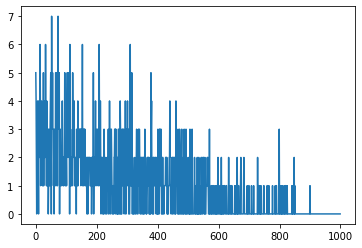

In [28]:
pop = 1000
v = {k: 0 for k in range(pop)}
# print(v)

def selectionTesting():
    def chooseParent():
        return min([random.randint(0, pop) for _ in range(3)])
    parent1 = chooseParent()
    parent2 = chooseParent()
    return (parent1, parent2) if parent1 != parent2 else selectionTesting()

for _ in range(1000//2):
    a, b, = selectionTesting()
    # print(a)
    # print(min(a))
    v[a] += 1
    v[b] += 1
# print(v)
Series(v).plot()

{(83, 12): 4, (29, 12): 4, (112, 13): 4, (91, 73): 4, (38, 1): 4, (22, 14): 4, (137, 25): 4, (34, 33): 3, (35, 29): 3, (26, 11): 3, (168, 98): 3, (182, 26): 3, (293, 114): 3, (220, 68): 3, (90, 57): 3, (132, 69): 3, (33, 9): 3, (133, 48): 3, (53, 6): 3, (89, 24): 3, (120, 1): 3, (22, 0): 3, (247, 15): 3, (101, 3): 3, (36, 13): 3, (65, 43): 3, (50, 34): 3, (62, 18): 3, (50, 18): 3, (75, 17): 3, (104, 10): 3, (131, 4): 3, (74, 5): 3, (129, 48): 3, (199, 20): 3, (46, 17): 3, (59, 17): 3, (18, 7): 3, (8, 2): 3, (244, 130): 3, (85, 67): 3, (67, 24): 3, (207, 8): 3, (68, 17): 3, (92, 14): 3, (97, 18): 3, (51, 15): 3, (112, 79): 3, (98, 82): 3, (52, 4): 3, (55, 47): 3, (118, 41): 3, (46, 3): 3, (121, 25): 3, (44, 31): 3, (139, 14): 3, (138, 2): 3, (41, 6): 3, (182, 12): 3, (42, 28): 3, (79, 21): 3, (119, 102): 3, (70, 43): 3, (9, 1): 3, (71, 29): 3, (92, 55): 3, (65, 1): 3, (60, 41): 3, (63, 12): 3, (104, 1): 3, (141, 32): 3, (20, 6): 3, (74, 47): 3, (106, 103): 3, (40, 37): 3, (178, 18): 3, 

<AxesSubplot:>

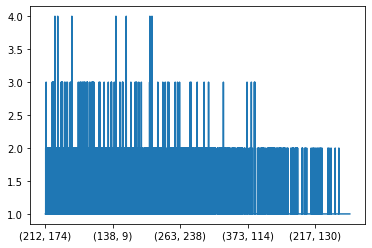

In [29]:
# a = {i:f"{i}{i}{i}" for i in range(5)}
pair = {}
# print(a)

def selectionTesting():
    def chooseParent():
        return min([random.randint(0, 1000) for _ in range(6)])
    parent1 = chooseParent()
    parent2 = chooseParent()
    return (parent1, parent2) if parent1 != parent2 else selectionTesting()

for _ in range(10000):
    par = selectionTesting()
    # print(par)
    par = list(par)
    par.sort(reverse=True)
    par = tuple(par)
    # print(par)
    # print(tuple(par))
    pair.setdefault(par, 0)
    pair[par] += 1

print({k: v for k, v in sorted(pair.items(), key=lambda item: item[1], reverse=True)})
Series(pair).plot()
# p1, p2 = selection(10)
# print(a[p1], a[p2])